In [46]:
%load_ext autoreload
%autoreload 2
import numpy as np
import qutip as qt 
import unitary_decomposition_optimizer as udo
from unitary_decomposition_optimizer.batch_global_test import BatchedGlobalOptimizer
import tensorflow as tf
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5606547193499663698, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5725121939992352458
 physical_device_desc: "device: XLA_CPU device"]

In [61]:
N = 50 #cavity hilbert space 
alpha = 2 + 1j #cat alpha
N_blocks = 5
N_multistart = 100
no_CD_end = True
initial_states = [qt.tensor(qt.basis(2,0),qt.basis(N,0))]
target_states = [qt.tensor(qt.basis(2,0), (qt.coherent(N,alpha) + qt.coherent(N,-alpha)).unit())]
#target_states = [qt.tensor(qt.basis(2,0),qt.basis(N,1))]
desired_epsilon = 1e-2
term_fid = 1-desired_epsilon

In [79]:
opt = BatchedGlobalOptimizer(initial_states=initial_states, target_states=target_states, N_blocks=N_blocks,term_fid = term_fid,
N_multistart=N_multistart)

In [77]:
all_fids = opt.optimize(epoch_size=5)


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.1

Epoch: 1 Avg Fid: 0.530072 Max fid: 0.953952


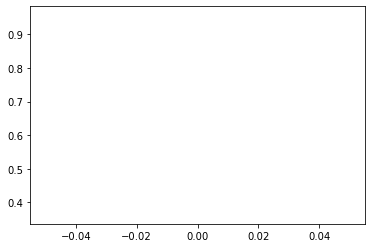

In [78]:
plt.figure()
for fids in all_fids:
    plt.plot(fids)

In [54]:
all_fids.shape

(16, 100)

In [51]:
fids

array([0.5254322 , 0.54758644, 0.79322666, 0.4121561 , 0.7855351 ,
       0.9910509 , 0.7396929 , 0.8612896 , 0.36900324, 0.5357504 ,
       0.38244277, 0.36921898, 0.3725544 , 0.90319467, 0.9540899 ,
       0.9644487 , 0.8002432 , 0.96991694, 0.8190674 , 0.89025635,
       0.88069904, 0.5540735 , 0.79863745, 0.54075325, 0.3720422 ,
       0.928188  , 0.93800795, 0.43207362, 0.6781589 , 0.5897708 ,
       0.8668791 , 0.6447109 , 0.97731435, 0.6997353 , 0.41570538,
       0.6700165 , 0.44059724, 0.53752595, 0.958031  , 0.682721  ,
       0.94416785, 0.9722764 , 0.3747987 , 0.39641917, 0.66175956,
       0.44937396, 0.3670658 , 0.40015104, 0.37292868, 0.44700238,
       0.66514957, 0.40400386, 0.9787056 , 0.8448638 , 0.6503683 ,
       0.41060072, 0.4080773 , 0.9096114 , 0.65518934, 0.69206953,
       0.62246937, 0.46571732, 0.42839915, 0.7666348 , 0.7191928 ,
       0.6820271 , 0.72165656, 0.48588872, 0.611848  , 0.37710723,
       0.46638542, 0.9798842 , 0.5792851 , 0.7844091 , 0.94790

In [24]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [25]:
with tf.device("XLA_GPU:0"):
    a = tf.constant(1.0)

[autoreload of unitary_decomposition_optimizer.batch_global_test failed: Traceback (most recent call last):
  File "C:\ProgramData\Miniconda3\envs\tf_env\lib\site-packages\IPython\extensions\autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "D:\alec\Projects\CD_universal_control\Simulations\CD_control\unitary_decomposition_optimizer\batch_global_test.py", line 61
    with tf.device("XLA_GPU:0):
                              ^
SyntaxError: EOL while scanning string literal
]


ValueError: Unknown attribute: 'XLA_GPU' in 'XLA_GPU:0'

In [26]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2632440045583715788, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3455532801952576930
 physical_device_desc: "device: XLA_CPU device"]

In [27]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]